# Results Analysis

The purpose of this notebook is to analyze the results from the RNN training experiments.

Unless otherwise stated, we will refer to the trained RNN as "the RNN". All validation numbers are RMSE.

## Environment Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from data_funcs import from_json

In [2]:
results = from_json("data/output.json")

reading  data/output.json
filename not present
title not present
note not present
hours not present
h2 not present
case not present
E not present
Ed not present
Ew not present
Ec not present
rain not present
fm not present
m not present
items: ['0', '1', '2', '3']
0 = {'cases': {'case11': {'Augmented KF': {'all': 0.9061249439407393, 'predict': 1.0984268618847821, 'train': 0.33047073142627476}, 'RNN initial': {'all': 1.4983486205665615, 'predict': 1.58343693275214, 'train': 1.3269545567623797}, 'RNN trained': {'all': 0.7571178921192675, 'predict': 0.7329811098096649, 'train': 0.7997781420018454}}}, 'params': {'DeltaE': [0, -1], 'T1': 0.1, 'activation': ['linear', 'linear'], 'cases': ['case11'], 'centering': [0.0, 0.0], 'dense_layers': 1, 'dense_units': 1, 'epochs': 5000, 'fm_raise_vs_rain': 2.0, 'hidden_units': 6, 'id': 0, 'note': 'check 5 should give zero error', 'purpose': 'reproducibility', 'rain_do': False, 'scale': 0, 'synthetic': False, 'timesteps': 5, 'verbose': False, 'verbose_f

## Control Case

Case 11 with param set 0 was the reproducibility case.

In [3]:
pd.DataFrame(results['0']['cases']['case11'])

,Augmented KF,RNN initial,RNN trained
all,0.906125,1.498349,0.757118
predict,1.098427,1.583437,0.732981
train,0.330471,1.326955,0.799778


The RNN outperforms the KF in this case. Note the prediction RMSE is lower than the training RMSE for the RNN, indicating there are not signs of overfitting. The KF, by contrast, has very low training error but a prediction error over 3x larger.

## Summarise Results

### Param Set Descriptions

In [4]:
for i in range(1, len(results)):
    print('~'*50)
    print(results[str(i)]['params'])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'DeltaE': [0, -1], 'T1': 0.1, 'activation': ['linear', 'linear'], 'cases': ['case1', 'case2', 'case3', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9', 'case10', 'case11', 'case12', 'case13'], 'centering': [0.0, 0.0], 'dense_layers': 1, 'dense_units': 1, 'epochs': 1000, 'fm_raise_vs_rain': 2.0, 'hidden_units': 20, 'id': 1, 'purpose': 'test 1', 'rain_do': True, 'scale': 1, 'synthetic': False, 'timesteps': 5, 'train_frac': 0.5, 'verbose': False, 'verbose_fit': False, 'verbose_weights': False}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'DeltaE': [0, -1], 'T1': 0.1, 'activation': ['tanh', 'tanh'], 'cases': ['case1', 'case2', 'case3', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9', 'case10', 'case11', 'case12', 'case13'], 'centering': [0.0, 0.0], 'dense_layers': 1, 'dense_units': 1, 'epochs': 10000, 'fm_raise_vs_rain': 2.0, 'hidden_units': 20, 'id': 2, 'purpose': 'test 2', 'rain_do': True, 'scale': 0.8, 'synthetic': Fal

The main differences in these param sets are:

* Activation functions: linear for the first case, then tanh, and then sigmoid.
* Epochs: 1,000 for set 1 versus 10,000 for sets 2 and 3
* Scaling: 1, .8, .8
* Centering: 0, 0, .5

Each param set was run on 7 cases:

### Extract Results

Excluding param set 0, as that was only run on case 11.

In [5]:
for i in range(1, len(results)):
    print('~'*50)
    print(results[str(i)]['cases'].keys())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dict_keys(['case10', 'case11', 'case12', 'case13', 'case7', 'case8', 'case9'])
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dict_keys(['case10', 'case11', 'case12', 'case13', 'case7', 'case8', 'case9'])
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dict_keys(['case10', 'case11', 'case12', 'case13', 'case7', 'case8', 'case9'])


We summarise the RMSE for the param sets:

Each case has 9 RMSE values:

In [6]:
pd.DataFrame(results[str(1)]['cases']['case10'])

,Augmented KF,RNN initial,RNN trained
all,1.124729,30.839032,2.902536
predict,1.417084,2.894544,3.666479
train,0.722431,43.516817,1.845634


We next build a long-format dataframe with all of the results from the results dictionary. There are 3 param sets, 3 models, 3 time periods, and 7 cases. So we expect a dataframe of $3\cdot3\cdot3\cdot7=189$ rows

In [7]:
df = pd.DataFrame(columns=['Period', 'Case', 'RMSE', 'Model'])
for i in range(1, len(results)):
    for case in results[str(i)]['cases']:
        df_temp = pd.DataFrame(results[str(i)]['cases'][case])
        df_temp=df_temp.rename_axis("Period").reset_index()
        df_temp['Case']=np.repeat(case, 3)
        df_temp['param_set']=np.repeat(int(i), 3)
        df_temp=pd.melt(df_temp, id_vars=['Period', 'Case', 'param_set'], value_vars=['Augmented KF', 'RNN initial', 'RNN trained'],
                     var_name='Model', value_name='RMSE')
        df = pd.concat((df, df_temp))

df

,Period,Case,RMSE,Model,param_set
0,all,case10,1.124729,Augmented KF,1.0
1,predict,case10,1.417084,Augmented KF,1.0
2,train,case10,0.722431,Augmented KF,1.0
3,all,case10,30.839032,RNN initial,1.0
4,predict,case10,2.894544,RNN initial,1.0
...,...,...,...,...,...
4,predict,case9,5.425546,RNN initial,3.0
5,train,case9,6.979473,RNN initial,3.0
6,all,case9,1.746044,RNN trained,3.0
7,predict,case9,1.634083,RNN trained,3.0


### Results by Param Set

Excluding RNN initial.

Text(0.5, 1.0, 'Results by Param Set')

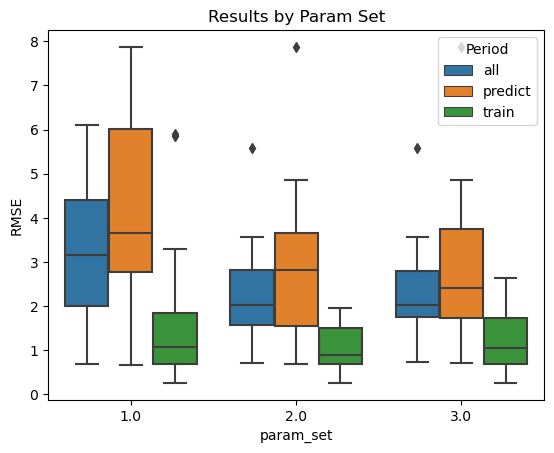

In [8]:
df2 = df[df.Model != 'RNN initial']
sns.boxplot(
    x=df2['param_set'],
    y=df2['RMSE'],
    hue=df2['Period']
).set_title('Results by Param Set')

We print the group means...

In [9]:
x=df2.groupby(['param_set', 'Period']).agg({'RMSE': 'mean'})
pd.DataFrame({
    'Period': ['all', 'predict', 'train'],
    'Set 1': list(x.RMSE[0:3]),
    'Set 2': list(x.RMSE[3:6]),
    'Set 3': list(x.RMSE[6:9])
})

,Period,Set 1,Set 2,Set 3
0,all,3.256066,2.288899,2.315709
1,predict,4.051542,2.985942,2.927416
2,train,1.821071,1.034109,1.180607


Param sets 2 and 3 have similar rates of prediction error, though the boxplots show there is substantial overlap.

### Results by Model

Here we just look at results from Param set 2 so we are not double (triple) counting results.

Again we exclude the untrained RNN from the plot as there are extreme values that distort the plot margins.

Text(0.5, 1.0, 'Results by Model')

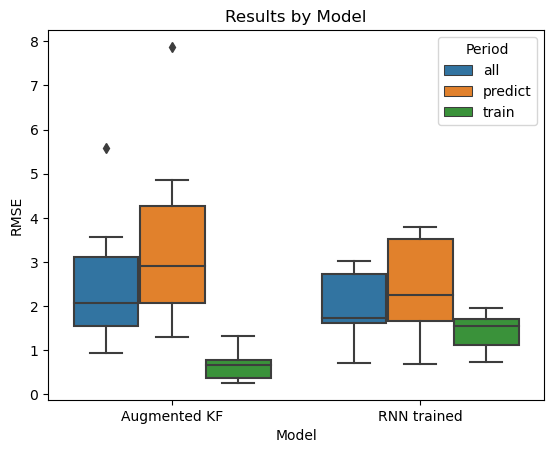

In [11]:
df2 = df[(df.Model != 'RNN initial') & (df.param_set == 2)]
sns.boxplot(
    x=df2['Model'],
    y=df2['RMSE'],
    hue=df2['Period']
).set_title('Results by Model')

In [14]:
x=df2.groupby(['Model', 'Period']).agg({'RMSE': 'mean'})
pd.DataFrame({
    'Period': ['all', 'predict', 'train'],
    'KF': list(x.RMSE[0:3]),
    'RNN Trained': list(x.RMSE[3:6])
})

,Period,KF,RNN Trained
0,all,2.556060,2.021738
1,predict,3.532067,2.439816
2,train,0.647931,1.420286


The trained RNN has a lower prediction error on average than the KF. 

The augmented Kalman Filter gets very low training error, but a much higher prediction error, over 5x. This is clear signs of overfitting.

In [27]:
df1=df[(df.Model == "Augmented KF") & (df.param_set==2)]
df2=df[(df.Model == "RNN trained") & (df.param_set==2)]

# Check equality of other cols
print(df1['Period'].equals(df1['Period']))
print(df1['Case'].equals(df1['Case']))

True
True


In [28]:
# Rename RMSE's then Add RMSE from df2 to df1
df1=df1.rename(columns={"RMSE": "RMSE KF"})
df2=df2.rename(columns={"RMSE": "RMSE RNN"})
# df1.join(df2['RMSE RNN'])
df1['RMSE RNN'] = df2['RMSE RNN'].to_numpy()

Text(6, 1, 'RNN Better')

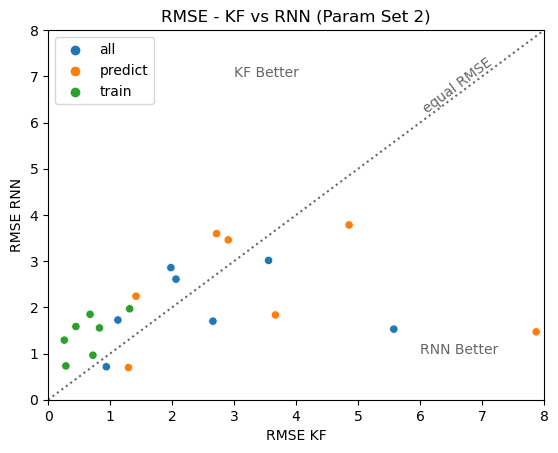

In [36]:
sns.scatterplot(
    data=df1, 
    x='RMSE KF', 
    y='RMSE RNN', 
    hue='Period')
plt.legend(loc="upper left")
plt.ylim(0,8)
plt.xlim(0,8)
plt.title("RMSE - KF vs RNN (Param Set 2)")
plt.axline((0, 0), slope=1, c='k', linestyle=':', alpha=.6)
plt.text(6,6.2,"equal RMSE",rotation=37, alpha=.6)
plt.text(3,7,"KF Better", alpha=.6)
plt.text(6,1,"RNN Better", alpha=.6)